In [1]:
#Import necessary libraries
import cv2
import math
import cvzone
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread("detect.jpg")

In [4]:
type(image)

numpy.ndarray

In [5]:
image.shape

(461, 768, 3)

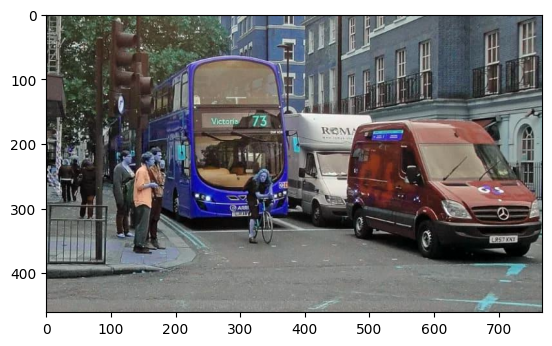

In [6]:
#By default open cv inverts image to BGR
plt.imshow(image)

In [7]:
#To convert image to RGB
new_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

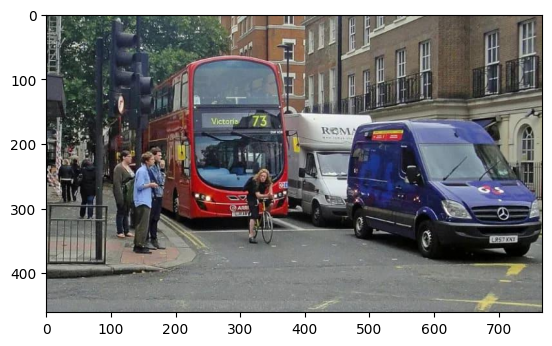

In [8]:
plt.imshow(new_image)

In [9]:
#Splitting image channels
r,g,b = cv2.split(new_image)
print('r',r.shape)
print('g',g.shape)
print('b',b.shape)

r (461, 768)
g (461, 768)
b (461, 768)


In [10]:
#merge the image
new_image = cv2.merge((r,g,b))

In [11]:
#resize the image
s = 10
w = int(new_image.shape[1]*s/100)
h = int(new_image.shape[0]*s/100)
dim = (w,h)
re_size = cv2.resize(new_image,dim,interpolation=cv2.INTER_AREA)
re_size.shape

(46, 76, 3)

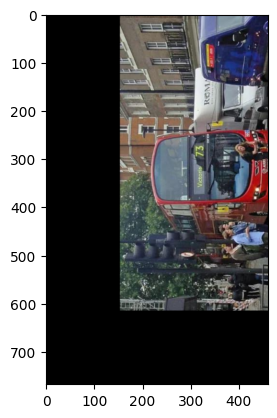

In [12]:
#Rotate Operation

(h,w) = new_image.shape[:2]
c = (w/2,h/2)
angle = 90
m = cv2.getRotationMatrix2D(c,angle,1.0)
rotate_90 = cv2.warpAffine(new_image,m,(h,w))

plt.imshow(rotate_90)

In [13]:
#Working with YOLO Algorithm version 3
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
yolo = cv2.dnn.readNet('yolov3-tiny.weights','yolov3-tiny.cfg')

In [15]:
classes = []
with open("coco.names",'r') as f:
    classes = f.read().splitlines()
    

In [16]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [17]:
len(classes)

80

In [18]:
img = cv2.imread('detect.jpg')
height, width = image.shape[:2] 
blob = cv2.dnn.blobFromImage(img, 1/255 ,(320,320),(0,0,0), swapRB = True, crop=False)

In [19]:
blob.shape

(1, 3, 320, 320)

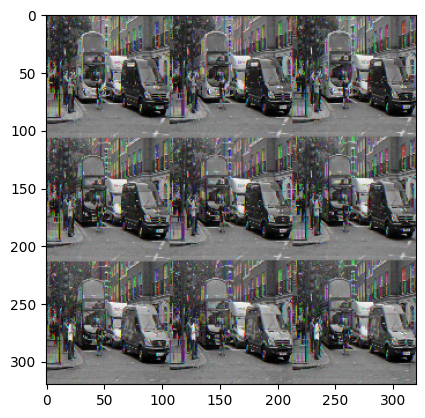

In [20]:
#To print Img
i = blob[0].reshape(320,320,3)
plt.imshow(i)

In [21]:
yolo.setInput(blob)

In [22]:
output_layers_names = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layers_names)

In [23]:
#We need to find where the bounding boxes are and label the bounding boxes
#There can be multiple boxes in image so create lists

boxes = []
confidences = []
class_ids =[]
 
for output in layeroutput:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > 0.7:
            center_x = int(detection[0]*width)
            center_y = int(detection[0]*height)
            w = int(detection[0]*width)
            h = int(detection[0]*height)


            x = int(center_x - w/2)
            y = int(center_y - h/2)

            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [24]:
#to detect how many objects are there in image and its labelled
len(boxes)

3

In [25]:
#Add bounding boxes to image
indexes = cv2.dnn.NMSBoxes(boxes,confidences, 0.5 , 0.4)

In [26]:
#Add font and confidence to image
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size = (len(boxes),3))

In [27]:
#Take each and every objects and add bounding boxes to them
for i in indexes.flatten():
    x,y,w,h = boxes[i]

    label = str(classes[class_ids[i]])
    confi = str(round(confidences[i],2))
    color = colors[i]

    #add rectangular bounding boxes
    cv2.rectangle(img,(x,y),(x+w,y+w),color,1)
    cv2.putText(img, label + " "+confi, (x,y+20),font,2,(255,255,255),1)

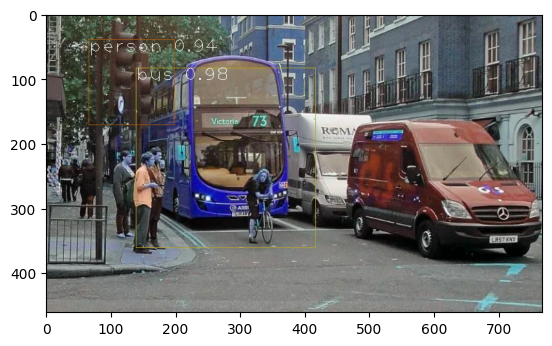

In [28]:
plt.imshow(img)

#Object Detection On Latest Yolo11 algorithm


In [29]:
#Object Detection using images

model = YOLO('yolo11n.pt')
result = model('detect.jpg',show=True)
cv2.waitKey(0)


image 1/1 c:\Users\Bharath\Desktop\OBJ\detect.jpg: 384x640 7 persons, 1 car, 3 buss, 1 truck, 1 traffic light, 588.6ms
Speed: 15.9ms preprocess, 588.6ms inference, 19.7ms postprocess per image at shape (1, 3, 384, 640)


-1

In [30]:
#Object Detection using videos

model = YOLO('yolo11n.pt')
result = model('vid2.mp4',show= True,stream=True)
for r in result:
    boxes = r.boxes  # Bounding box outputs
    masks = r.masks  # Segmentation masks (if applicable)
    probs = r.probs  # Class probabilities (if applicable)
    if cv2.waitKey(1) == 27:  # 27 is the ASCII code for 'Esc'
        break

cv2.destroyAllWindows()



video 1/1 (frame 1/943) c:\Users\Bharath\Desktop\OBJ\vid2.mp4: 384x640 6 persons, 6 cars, 1 bus, 1 backpack, 1608.1ms
video 1/1 (frame 2/943) c:\Users\Bharath\Desktop\OBJ\vid2.mp4: 384x640 5 persons, 6 cars, 1 bus, 687.1ms
video 1/1 (frame 3/943) c:\Users\Bharath\Desktop\OBJ\vid2.mp4: 384x640 4 persons, 6 cars, 1 bus, 675.4ms
video 1/1 (frame 4/943) c:\Users\Bharath\Desktop\OBJ\vid2.mp4: 384x640 4 persons, 6 cars, 1 bus, 550.6ms
video 1/1 (frame 5/943) c:\Users\Bharath\Desktop\OBJ\vid2.mp4: 384x640 4 persons, 6 cars, 1 bus, 1 backpack, 607.9ms
video 1/1 (frame 6/943) c:\Users\Bharath\Desktop\OBJ\vid2.mp4: 384x640 4 persons, 7 cars, 1 bus, 1 backpack, 1 handbag, 500.4ms
video 1/1 (frame 7/943) c:\Users\Bharath\Desktop\OBJ\vid2.mp4: 384x640 4 persons, 7 cars, 1 bus, 1 backpack, 1 handbag, 601.6ms
video 1/1 (frame 8/943) c:\Users\Bharath\Desktop\OBJ\vid2.mp4: 384x640 4 persons, 7 cars, 1 bus, 1 backpack, 1 handbag, 573.9ms


In [31]:
#Object Detection using Real time webcam

cap = cv2.VideoCapture(0)
model = YOLO('yolo11n.pt')

In [32]:
# Reading the class file

classnames = []
with open('classes.txt','r') as f:
    classnames = f.read().splitlines()

In [33]:
print(classnames)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [34]:
while True:
    ret, frame = cap.read()
    result = model(frame, stream=True)

    # Getting bbox, confidence and class names information to work with
    for info in result:
        boxes = info.boxes
        for box in boxes:
            confidence = box.conf[0]
            confidence = math.ceil(confidence * 100)
            Class = int(box.cls[0])
            if confidence > 55:
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cvzone.putTextRect(frame, f'{classnames[Class]} {confidence}%', [x1 + 8, y1 - 12],
                                   scale=2, thickness=2)

    cv2.imshow('frame', frame)
    key = cv2.waitKey(1)
    if key == 27:  # ASCII value of 'Esc' key
        break

cv2.destroyAllWindows()



0: 480x640 1 person, 979.4ms
Speed: 10.2ms preprocess, 979.4ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 711.3ms
Speed: 22.4ms preprocess, 711.3ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 596.8ms
Speed: 31.0ms preprocess, 596.8ms inference, 4.5ms postprocess per image at shape (1, 3, 480, 640)


In [ ]:
from ultralytics import YOLO

# Load the YOLO model
model_path = "C:/Users/Bharath/Desktop/OBJ/yolo11n.pt"
model = YOLO(model_path)

# Run evaluation on test data
results = model.val(data="C:/Users/Bharath/Desktop/OBJ/yolo11n.pt", iou=0.5, conf=0.5)

# Print key performance metrics
print(f"mAP50: {results.box.map50:.2f}")  # mAP@0.5
print(f"mAP50-95: {results.box.map:.2f}")  # mAP@0.5:0.95
print(f"Precision: {results.box.precision:.2f}")
print(f"Recall: {results.box.recall:.2f}")


Ultralytics 8.3.63  Python-3.12.8 torch-2.5.1+cpu CPU (AMD PRO A10-8700B R6, 10 Compute Cores 4C+6G)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


FileNotFoundError: 'C:/Users/Bharath/Desktop/OBJ/dataset.yaml' does not exist